In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## data ausopen men 2013
AM3=pd.read_csv("/content/AusOpen-men-2013.csv")
AM3
AW3=pd.read_csv("/content/AusOpen-women-2013.csv")
UM3=pd.read_csv("/content/USOpen-men-2013.csv")
UW3=pd.read_csv("/content/USOpen-women-2013.csv")
WM3=pd.read_csv("/content/Wimbledon-men-2013.csv")
WW3=pd.read_csv("/content/Wimbledon-women-2013.csv")
FW3=pd.read_csv("/content/FrenchOpen-women-2013.csv")
FM3=pd.read_csv("/content/FrenchOpen-men-2013.csv")


In [3]:
sns.set(rc={"figure.figsize":(15,12)})

In [ ]:
# Q1
# 1)	Do players with a high number of Aces tend to win the match in all tournaments?

In [4]:
qwe=[AM3,AW3,UM3,UW3,FM3,FW3,WM3,WW3]
winn=[]

for i in qwe:
  j=i[i["Result"]==1]
  k=i[i["Result"]==0]

  total=j.shape[0]+k.shape[0]
  win=j[j["ACE.1"]>j["ACE.2"]].shape[0]+k[k["ACE.1"]<k["ACE.2"]].shape[0]+k[k["ACE.1"]==k["ACE.2"]].shape[0]+j[j["ACE.1"]==j["ACE.2"]].shape[0]

  loss=j[j["ACE.1"]<j["ACE.2"]].shape[0]+k[k["ACE.1"]>k["ACE.2"]].shape[0]
  winn.append(total)
  winn.append(win)
  winn.append(loss)


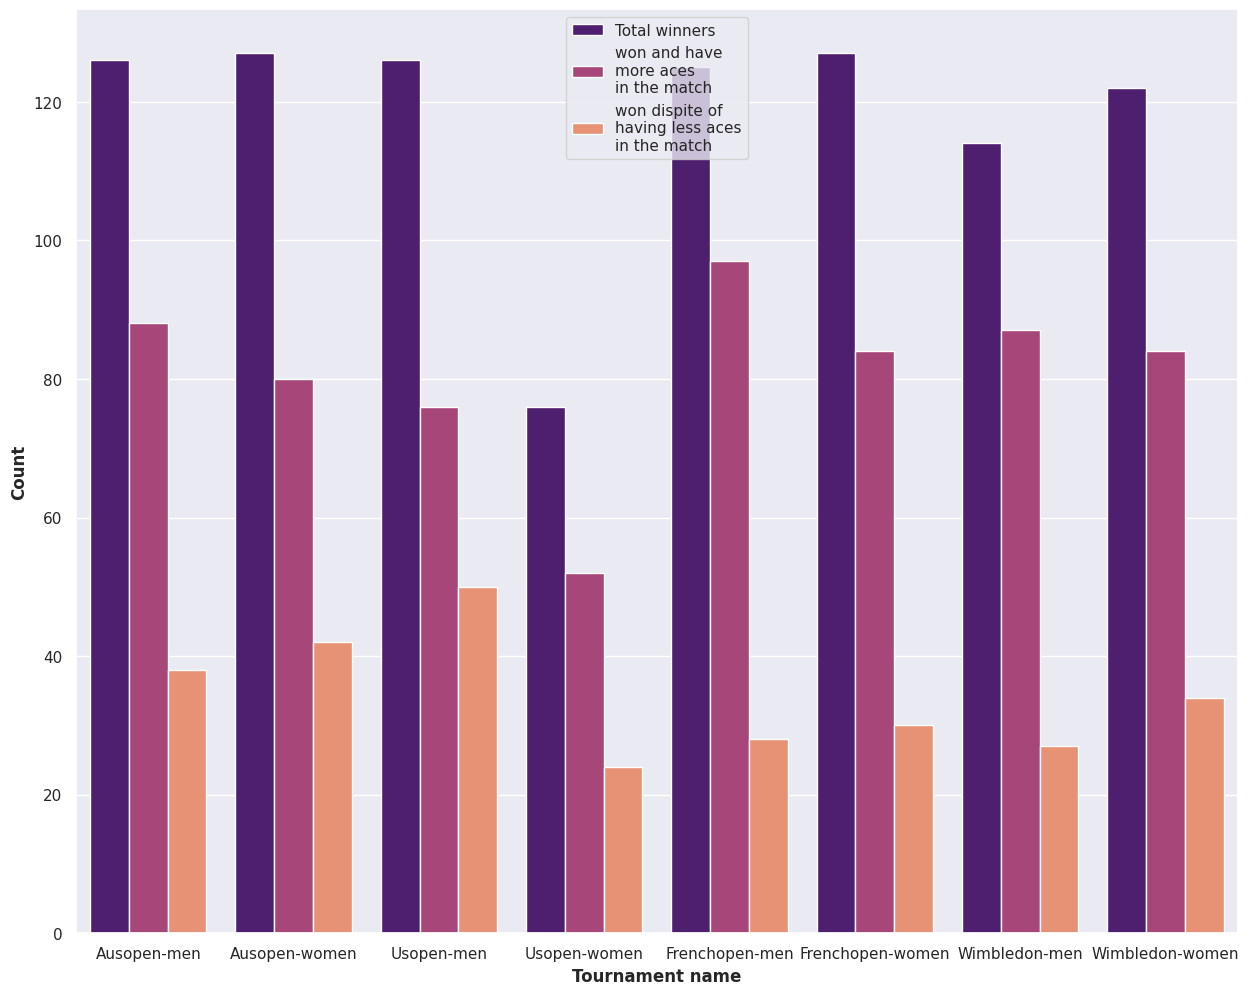

In [23]:
names=["Ausopen-men","Ausopen-men","Ausopen-men","Ausopen-women","Ausopen-women","Ausopen-women","Usopen-men","Usopen-men","Usopen-men","Usopen-women","Usopen-women","Usopen-women","Frenchopen-men","Frenchopen-men","Frenchopen-men","Frenchopen-women","Frenchopen-women","Frenchopen-women","Wimbledon-men","Wimbledon-men","Wimbledon-men","Wimbledon-women","Wimbledon-women","Wimbledon-women"]
z1=["Total winners","won and have\nmore aces\nin the match ","won dispite of\nhaving less aces\nin the match"]
z=z1*8

data={"Tournament name":names,"Count":winn,"Index":z}
data=pd.DataFrame(data)
data

sns.barplot(x="Tournament name",y="Count",data=data,hue="Index",palette="magma")
plt.xlabel("Tournament name",fontweight="bold")
plt.ylabel("Count",fontweight="bold")

plt.legend(loc="upper center")




In [ ]:
#Q2
# 2)	Is there any relation between winning 1st set and winning the match?

[99, 27, 104, 22, 105, 21, 65, 11, 100, 25, 110, 16, 91, 23, 102, 20]


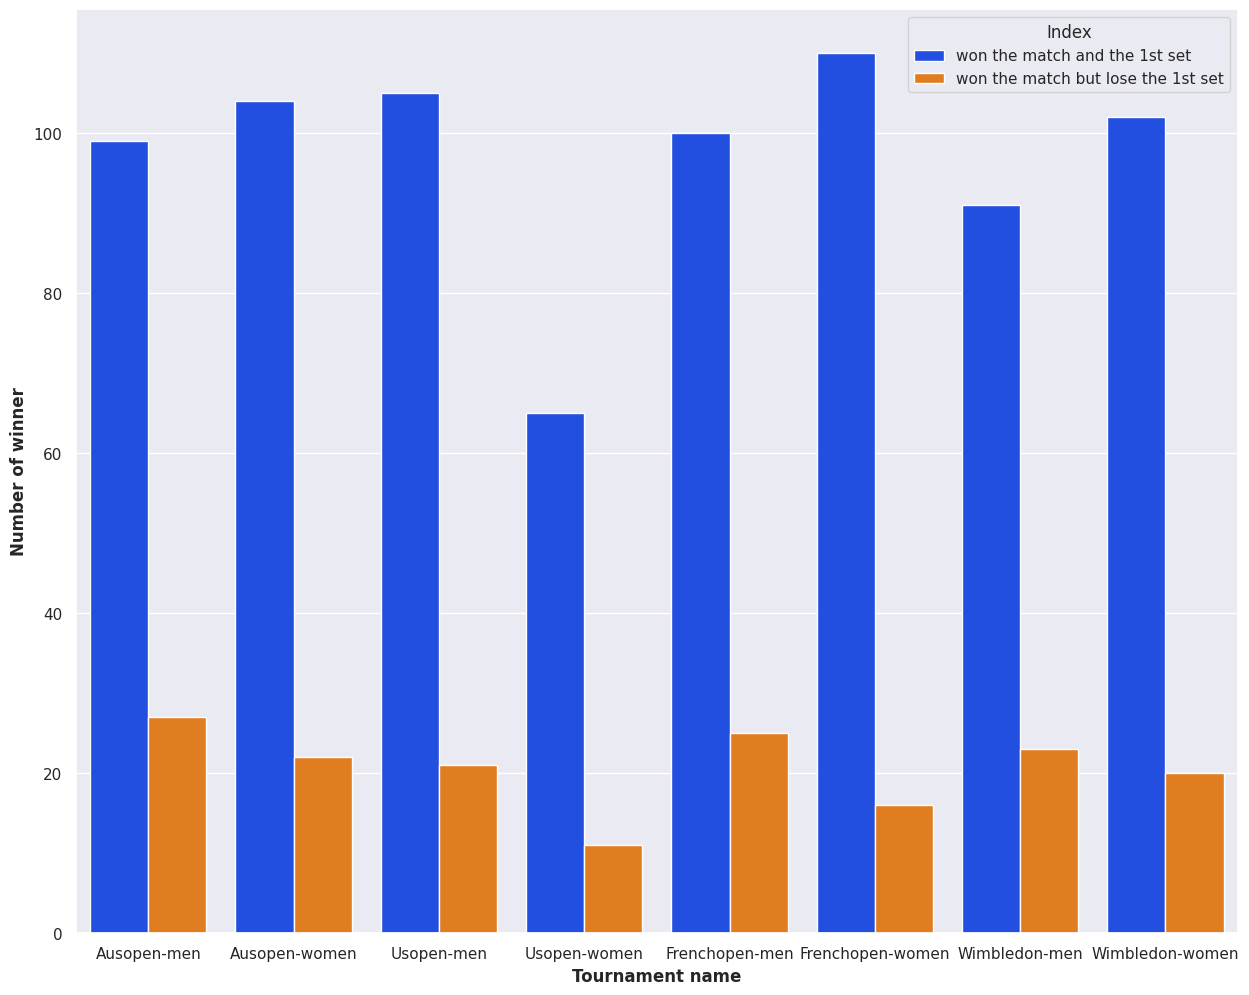

In [12]:
key1=[AM3,AW3,UM3,UW3,FM3,FW3,WM3,WW3]
winer=[]

for key in key1:
  r1=np.where((key["Result"]==1) & (key["ST1.1"]>key["ST1.2"])) # player 1 won 1st set and game
  r11=np.where((key["Result"]==1) & (key["ST1.1"]<key["ST1.2"])) # player 1 lose 1st set but won game
  
  r0=np.where((key["Result"]==0) & (key["ST1.1"]>key["ST1.2"])) # player 2 won but lose 1st set 
  r01=np.where((key["Result"]==0) & (key["ST1.1"]<key["ST1.2"])) #player 2 won and won 1st set
  ee=len(r1[0])+len(r01[0])
  bb=len(r11[0])+len(r0[0])
  winer.append(ee)
  winer.append(bb)
print(winer)
names=["Ausopen-men","Ausopen-men","Ausopen-women","Ausopen-women","Usopen-men","Usopen-men","Usopen-women","Usopen-women","Frenchopen-men","Frenchopen-men","Frenchopen-women","Frenchopen-women","Wimbledon-men","Wimbledon-men","Wimbledon-women","Wimbledon-women"]
z=["won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set","won the match and the 1st set","won the match but lose the 1st set"]
data={"Number of winner":winer,"Tournament name":names,"Index":z}
data=pd.DataFrame(data)
data



sns.barplot(x="Tournament name",y="Number of winner",data=data,hue="Index",palette="bright")
plt.xlabel("Tournament name",fontweight="bold")
plt.ylabel("Number of winner",fontweight="bold"
plt.show()







In [ ]:
#Q3
# Which among the four tournaments for men is tougher when it comes to winning a breakpoint?

In [13]:
AM31 = AM3.loc[AM3["Round"] == 1].copy()
AM31.loc[:, "TOUR"] = "Ausopen"

FM31 = FM3.loc[FM3["Round"] == 1].copy()
FM31.loc[:, "TOUR"] = "Frenchopen"

WM31=WM3.loc[WM3["Round"]==1].copy()
WM31.loc[:,"TOUR"]="Wimbledon"

UM31=UM3.loc[UM3["Round"]==1].copy()
UM31.loc[:,"TOUR"]="USopen"

# FM31=FM3.loc[FM3["Round"]==1].copy()
# FM31.loc[:,"TOUR"]="FM3"


In [14]:
AM31=AM31.append(FM31,ignore_index=True)
AM31=AM31.append(WM31,ignore_index=True)
AM31=AM31.append(UM31,ignore_index=True)


<ipython-input-14-a5361f0383b4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AM31=AM31.append(FM31,ignore_index=True)
<ipython-input-14-a5361f0383b4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AM31=AM31.append(WM31,ignore_index=True)
<ipython-input-14-a5361f0383b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AM31=AM31.append(UM31,ignore_index=True)


In [15]:
AM31["TOTALBPC"]=AM31["BPC.1"]+AM31["BPC.2"]
AM31["TOTALBPW"]=AM31["BPW.1"]+AM31["BPW.2"]



,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,TOUR,FNL1,FNL2,TOTALBPC,TOTALBPW
0,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,18,...,6,7.0,6.0,NaN,NaN,Ausopen,NaN,NaN,5,11
1,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,13,...,1,3.0,1.0,NaN,NaN,Ausopen,NaN,NaN,7,14
2,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,20,...,6,7.0,6.0,NaN,NaN,Ausopen,NaN,NaN,5,22
3,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,24,...,2,2.0,3.0,NaN,NaN,Ausopen,NaN,NaN,7,16
4,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,12,...,1,6.0,7.0,6.0,NaN,Ausopen,NaN,NaN,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Lukas Lacko,Somdev Devvarman,1,0,NaN,NaN,50,48,50,29,...,4,6.0,6.0,4.0,6.0,USopen,2.0,3.0,13,24
251,Stanislas Wawrinka,Radek Stepanek,1,1,NaN,NaN,51,32,49,27,...,6,3.0,2.0,NaN,NaN,USopen,3.0,0.0,9,20
252,James Blake,Ivo Karlovic,1,0,NaN,NaN,64,82,36,36,...,6,3.0,6.0,7.0,7.0,USopen,2.0,3.0,7,22
253,Marcos Baghdatis,Go Soeda,1,1,NaN,NaN,60,34,40,20,...,4,3.0,1.0,NaN,NaN,USopen,3.0,0.0,5,11


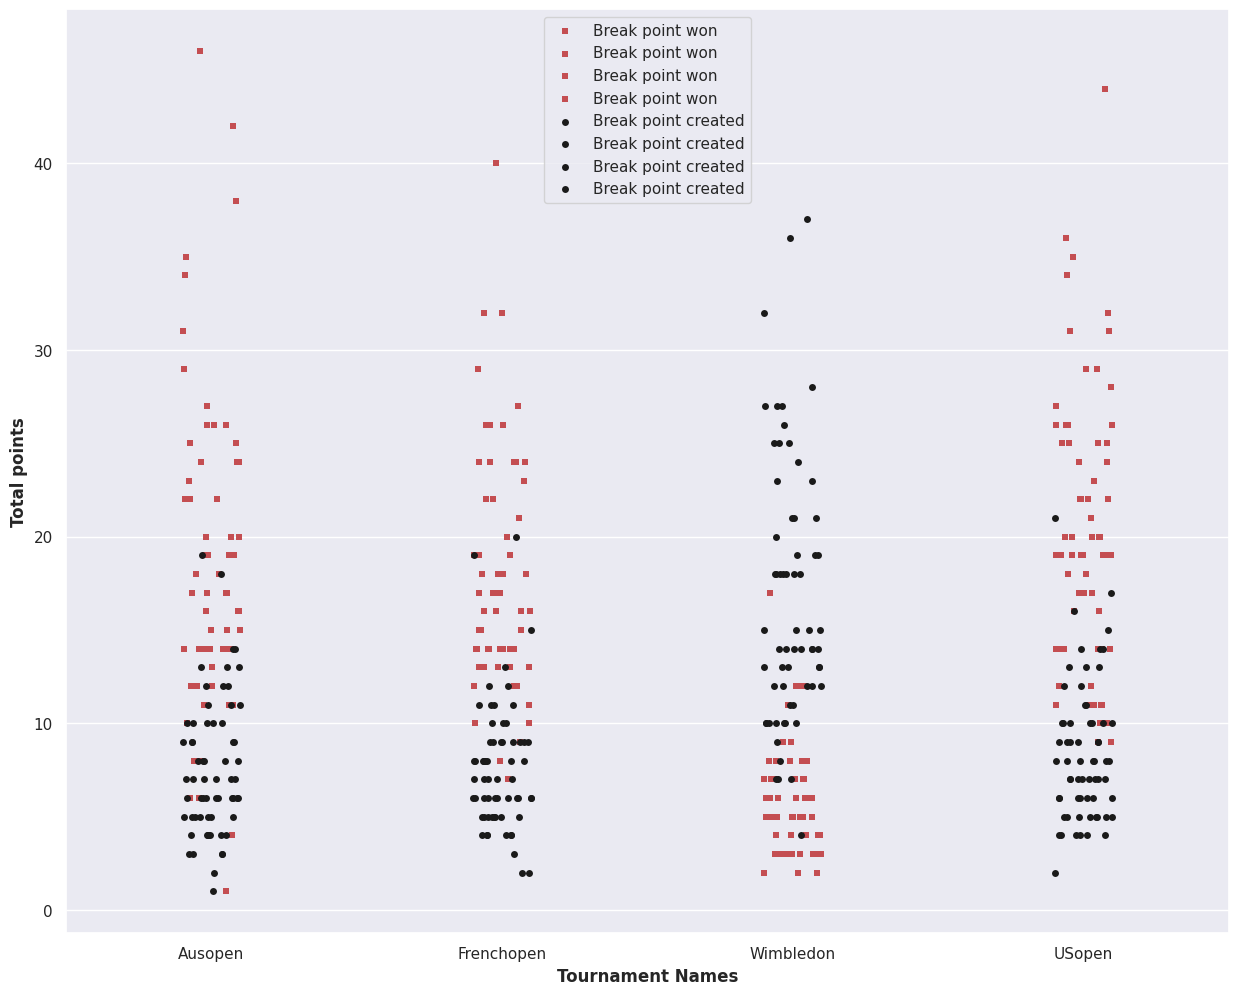

In [22]:
strip1=sns.stripplot(x="TOUR",y="TOTALBPW",data=AM31,label="Break point won",color="r",marker="s")
strip2=sns.stripplot(x="TOUR",y="TOTALBPC",data=AM31,label="Break point created",color="k")



plt.xlabel("Tournament Names",fontweight="bold")
plt.ylabel("Total points",fontweight="bold")
plt.legend(loc="upper center")
plt.show()


In [ ]:
## q4
# 4)	What is the probability that the player will win the 2nd set, given that he won the 1st set?

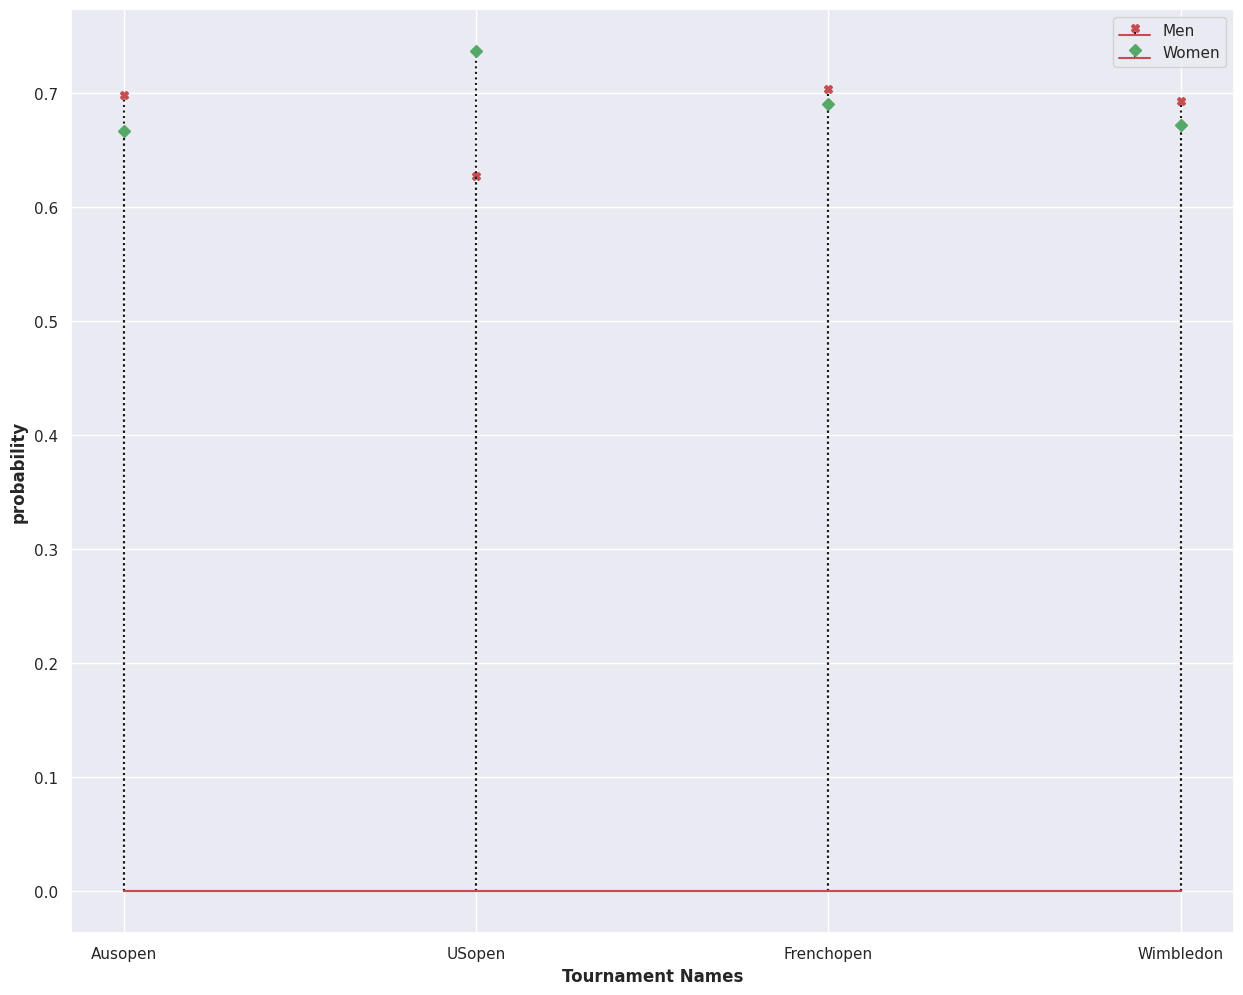

In [24]:
PM=[]
TOURM=[AM3,UM3,FM3,WM3]

for i in TOURM:  
  AM11=i[i["ST1.1"]>i["ST1.2"]] # PLAYER 1 WON 1ST SET
  AM21=AM11[AM11["ST2.1"]>AM11["ST2.2"]]  ## PLAYER 1 WON 2ND SET WHEN ALREADY WON 1ST

  AM12=i[i["ST1.2"]>i["ST1.1"]]
  AM22=AM12[AM12["ST2.1"]<AM12["ST2.2"]]

  P1=AM11.shape[0]+AM12.shape[0]
  P2=AM21.shape[0]+AM22.shape[0]
  P12=P2/P1
  PM.append(P12)

TOURMP=["AM","UM","FM","WM"]

PF=[]
TOURF=[AW3,UW3,FW3,WW3]

for i in TOURF:  
  AM11=i[i["ST1.1"]>i["ST1.2"]] # PLAYER 1 WON 1ST SET
  AM21=AM11[AM11["ST2.1"]>AM11["ST2.2"]]  ## PLAYER 1 WON 2ND SET WHEN ALREADY WON 1ST

  AM12=i[i["ST1.2"]>i["ST1.1"]]
  AM22=AM12[AM12["ST2.1"]<AM12["ST2.2"]]

  P1=AM11.shape[0]+AM12.shape[0]
  P2=AM21.shape[0]+AM22.shape[0]
  P12=P2/P1
  PF.append(P12)

TOURMP=["Ausopen","USopen","Frenchopen","Wimbledon"]




stem1=plt.stem(TOURMP,PM,markerfmt='rX',linefmt='k:',label="Men")
stem2=plt.stem(TOURMP,PF,markerfmt='gD',linefmt='k:',label="Women")

plt.legend()
plt.ylabel("probability",fontweight="bold")
plt.xlabel("Tournament Names",fontweight="bold")
plt.show()





In [ ]:
#Q5
# 5)	Is there any change in Unforced Error (UFE) committed by players in Australian Open and French Open?


In [25]:
## creating main frame using am3

AM3NAMES1=AM3.loc[AM3["Round"]==1,"Player1"]
AM3NAMES2=AM3.loc[AM3["Round"]==1,"Player2"]
Q=list(AM3NAMES2)
Q1=list(AM3NAMES1)
q2=Q1+Q
Q2=pd.Series(q2)
Q2
dataF=pd.DataFrame()
dataF["NAMES"]=Q2



In [26]:
AM3UFE1=AM3.loc[AM3["Round"]==1,"UFE.1"]
AM3UFE2=AM3.loc[AM3["Round"]==1,"UFE.2"]
Q1=list(AM3UFE1)
Q2=list(AM3UFE2)
Q3=Q1+Q2
Q3=pd.Series(Q3)
dataF["AM3UFE"]=Q3


In [28]:
dataFM3=pd.DataFrame()
FM3NAMES1=FM3.loc[FM3["Round"]==1,"Player1"]
FM3NAMES2=FM3.loc[FM3["Round"]==1,"Player2"]
Q1=pd.Series(list(FM3NAMES1)+list(FM3NAMES2))
dataFM3["NAMES"]=Q1


FM3UFE1=FM3.loc[FM3["Round"]==1,"UFE.1"]
FM3UFE2=FM3.loc[FM3["Round"]==1,"UFE.2"]
Q1=pd.Series(list(FM3UFE1)+list(FM3UFE2))
dataFM3["FM3UFE"]=Q1


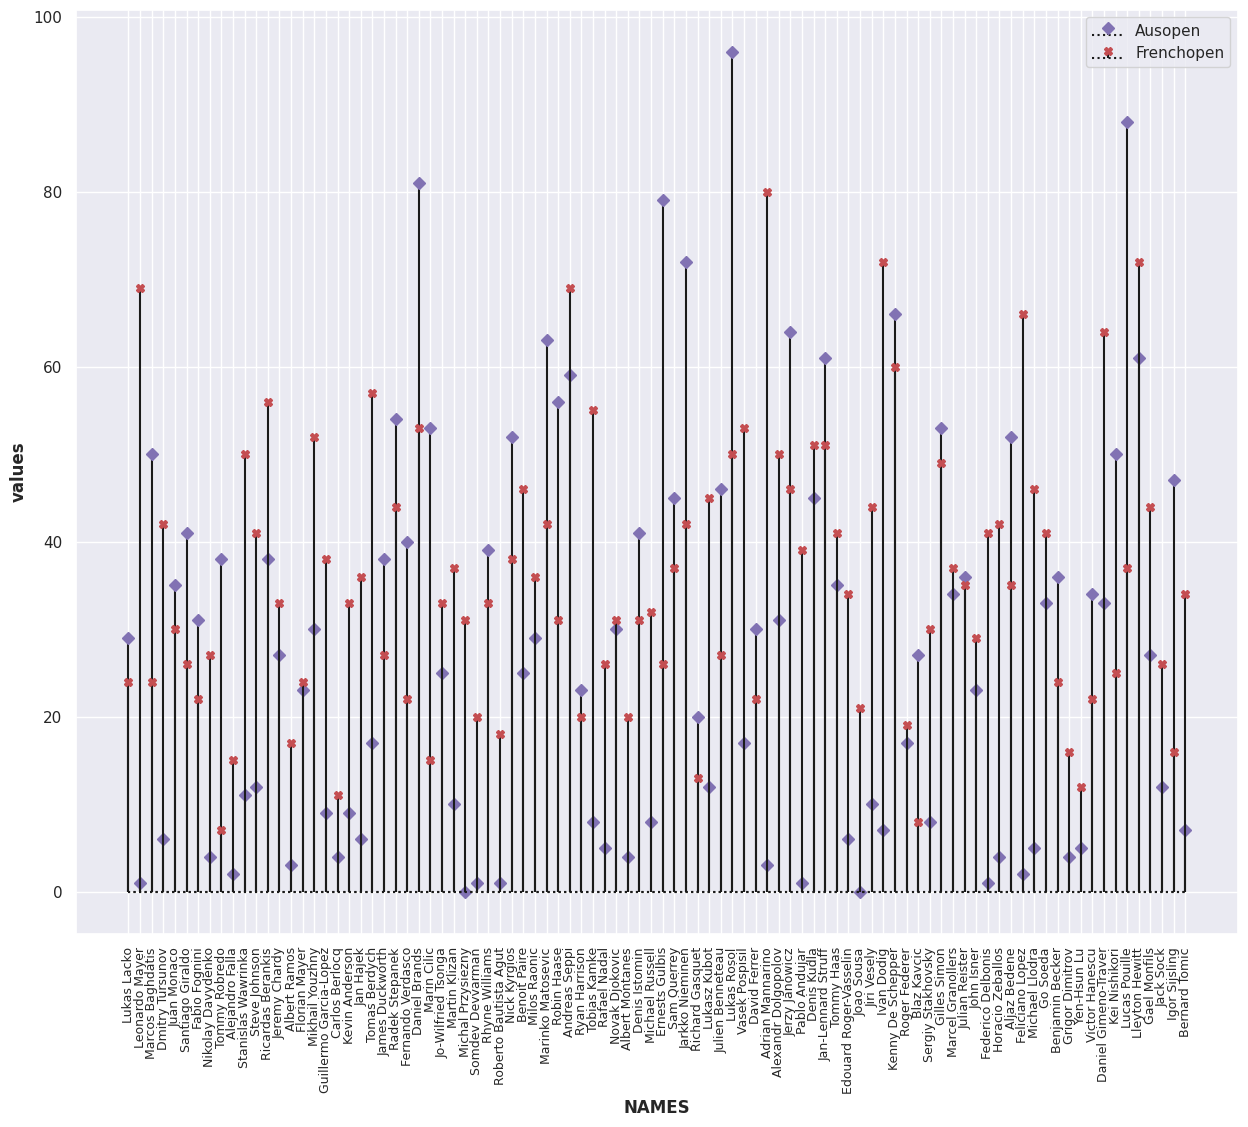

92
56


In [29]:
dataf1=pd.merge(dataF,dataFM3, on="NAMES")

s1=plt.stem(dataf1["NAMES"],dataf1["AM3UFE"],markerfmt="mD",basefmt=":k",linefmt="k",label="Ausopen")
s2=plt.stem(dataf1["NAMES"],dataf1["FM3UFE"],markerfmt="rX",basefmt=":k",linefmt="k",label="Frenchopen")
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("NAMES",fontweight="bold")
plt.ylabel("values",fontweight="bold")
plt.legend()
plt.show()
l=len(np.where((dataf1["AM3UFE"]<=dataf1["FM3UFE"]))[0])
print(dataf1.shape[0])

print(l)

In [ ]:
## Q6 
# 6)	What is the relationship between Net Point Attempted and Net point Won for different tournament?

In [30]:
d1=pd.DataFrame()
d1["NPA"]=AM3[["NPA.1","NPA.2"]].mean(axis=1)
d1["NPW"]=AM3[["NPW.1","NPW.2"]].mean(axis=1)

d2=pd.DataFrame()
d2["NPA"]=FM3[["NPA.1","NPA.2"]].mean(axis=1)
d2["NPW"]=FM3[["NPW.1","NPW.2"]].mean(axis=1)

d3=pd.DataFrame()
d3["NPA"]=WM3[["NPA.1","NPA.2"]].mean(axis=1)
d3["NPW"]=WM3[["NPW.1","NPW.2"]].mean(axis=1)

d4=pd.DataFrame()
d4["NPA"]=UM3[["NPA.1","NPA.2"]].mean(axis=1)
d4["NPW"]=UM3[["NPW.1","NPW.2"]].mean(axis=1)



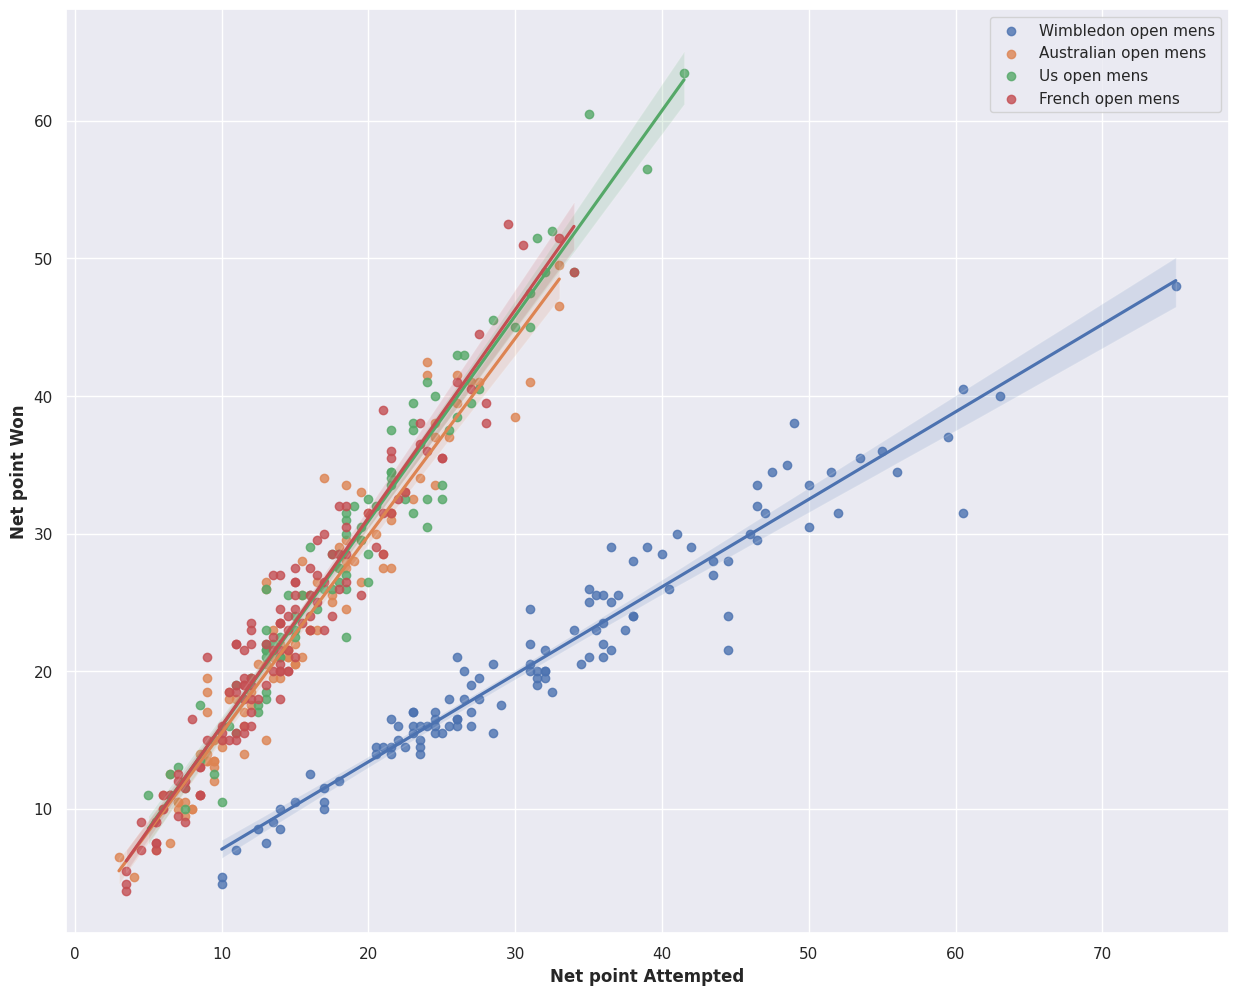

In [31]:
S1=sns.regplot(x="NPA",y="NPW",data=d3,label="Wimbledon open mens")
S2=sns.regplot(x="NPA",y="NPW",data=d1,label="Australian open mens")
S3=sns.regplot(x="NPA",y="NPW",data=d4,label="Us open mens")
S4=sns.regplot(x="NPA",y="NPW",data=d2,label="French open mens")
plt.legend()
plt.xlabel("Net point Attempted",fontweight="bold")
plt.ylabel("Net point Won",fontweight="bold")
plt.show()

In [33]:
d11=pd.DataFrame()
d11["NPA"]=AW3[["NPA.1","NPA.2"]].mean(axis=1)
d11["NPW"]=AW3[["NPW.1","NPW.2"]].mean(axis=1)

d22=pd.DataFrame()
d22["NPA"]=FW3[["NPA.1","NPA.2"]].mean(axis=1)
d22["NPW"]=FW3[["NPW.1","NPW.2"]].mean(axis=1)

d33=pd.DataFrame()
d33["NPA"]=WW3[["NPA.1","NPA.2"]].mean(axis=1)
d33["NPW"]=WW3[["NPW.1","NPW.2"]].mean(axis=1)

d44=pd.DataFrame()
d44["NPA"]=UW3[["NPA.1","NPA.2"]].mean(axis=1)
d44["NPW"]=UW3[["NPW.1","NPW.2"]].mean(axis=1)

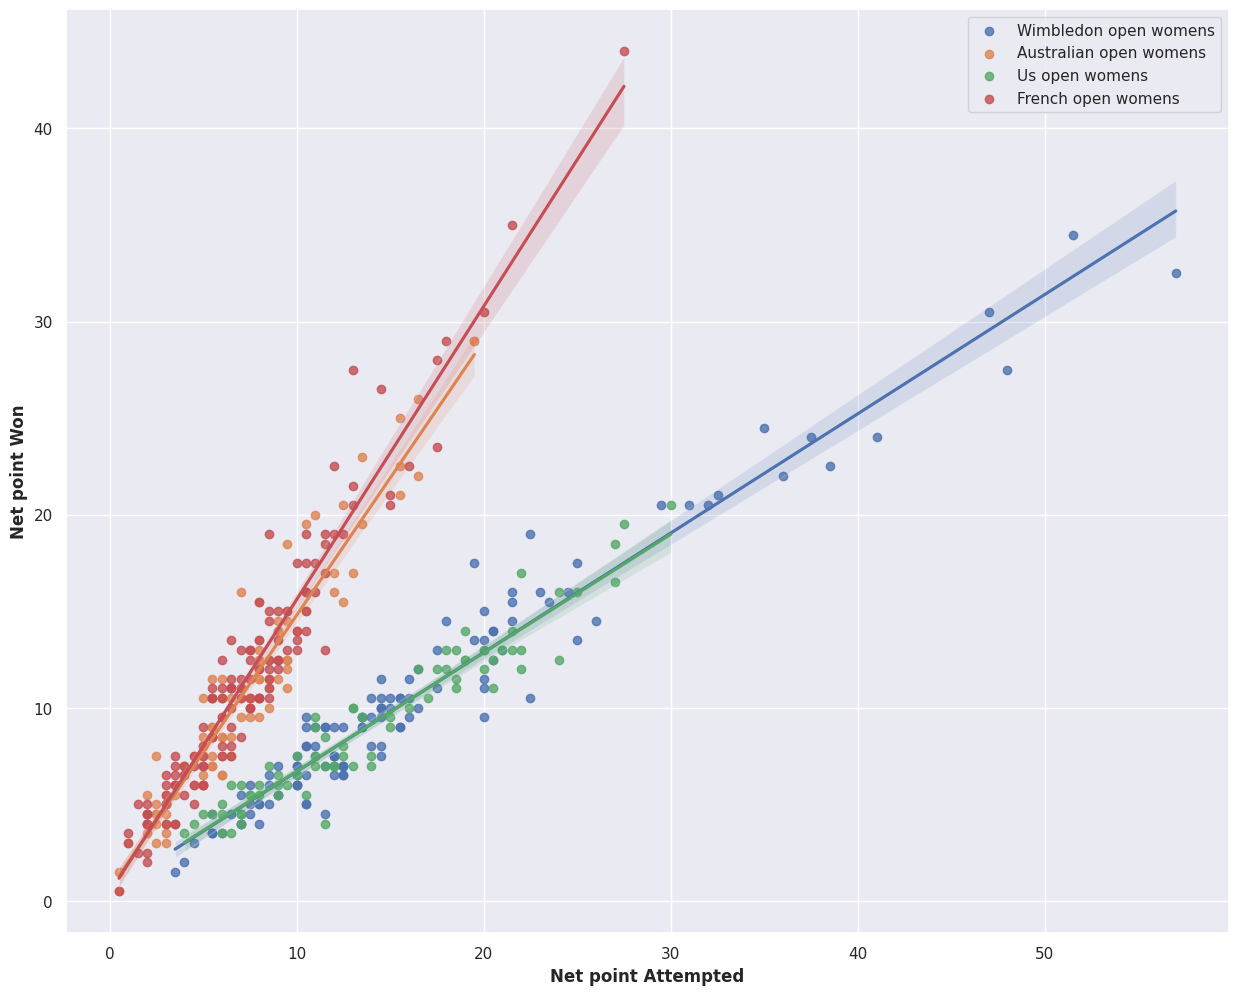

In [34]:
S1=sns.regplot(x="NPA",y="NPW",data=d33,label="Wimbledon open womens")
S2=sns.regplot(x="NPA",y="NPW",data=d11,label="Australian open womens")
S3=sns.regplot(x="NPA",y="NPW",data=d44,label="Us open womens")
S4=sns.regplot(x="NPA",y="NPW",data=d22,label="French open womens")
plt.legend()
plt.xlabel("Net point Attempted",fontweight="bold")
plt.ylabel("Net point Won",fontweight="bold")
plt.show()

In [ ]:
# q7 what are the distributuion of UFE in all tournament of womens  in all tournament?

In [35]:
AW3UFE=pd.Series(list(AW3["UFE.1"])+list(AW3["UFE.2"]))
FW3UFE=pd.Series(list(FW3["UFE.1"])+list(FW3["UFE.2"]))
WW3UFE=pd.Series(list(WW3["UFE.1"])+list(WW3["UFE.2"]))
UW3UFE=pd.Series(list(UW3["UFE.1"])+list(UW3["UFE.2"]))


Text(0.5, 0, 'Tournament Names')

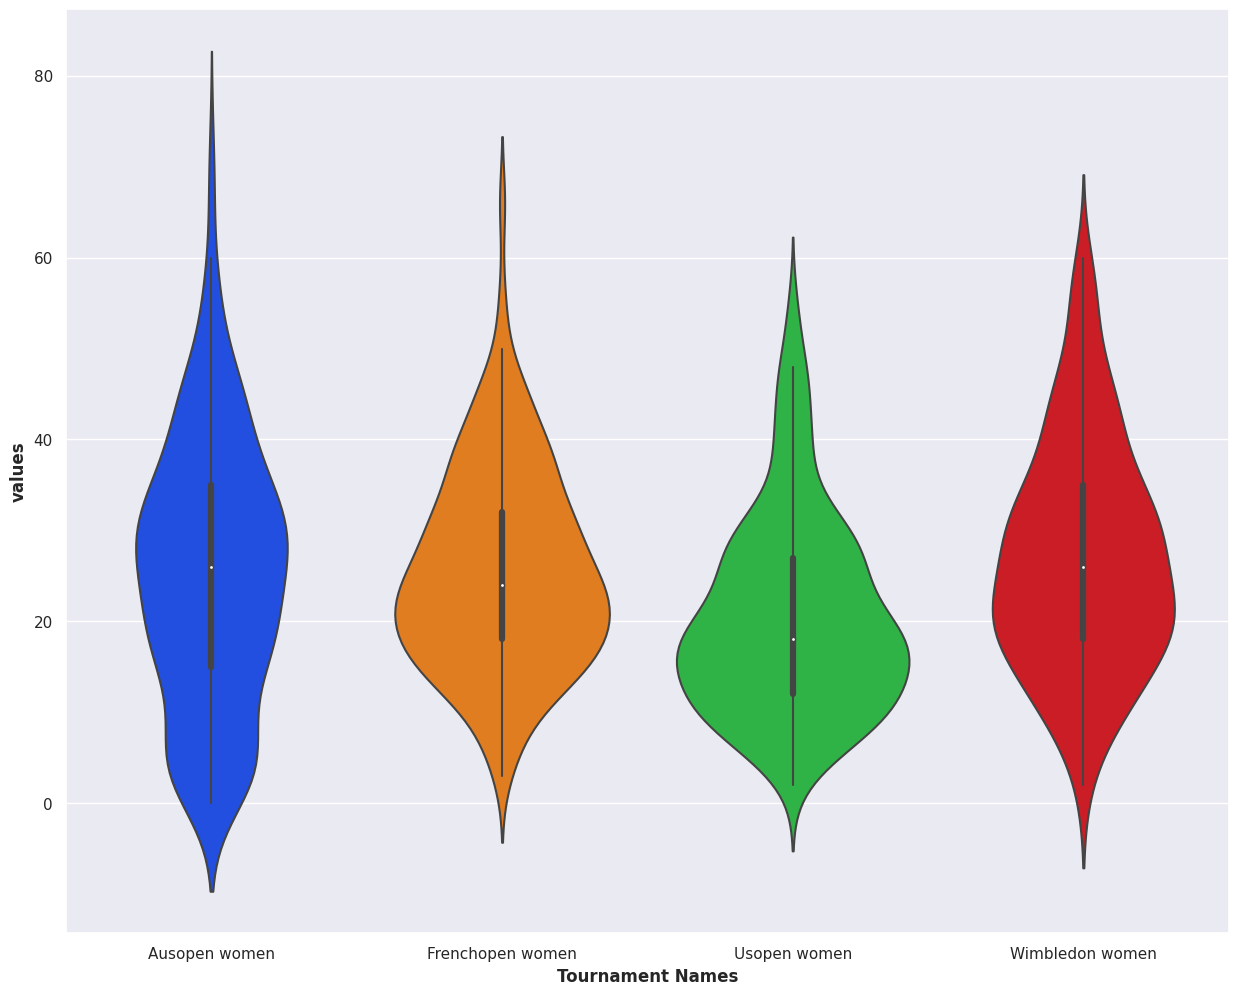

In [36]:
sns.violinplot(data=[AW3UFE,FW3UFE,WW3UFE,UW3UFE],palette="bright")
labels=["Ausopen women","Frenchopen women","Usopen women","Wimbledon women"]
plt.xticks([0,1,2,3], labels)
plt.ylabel("values",fontweight="bold")
plt.xlabel("Tournament Names",fontweight="bold")


In [ ]:
# Q8 
# 8)	What are the average First serve percentage and average First serve won for women in the Australian Open, French Open, and Wimbledon?

In [37]:
AW3NAMES1=AW3.loc[AW3["Round"]==1,"player1"]
AW3NAMES2=AW3.loc[AW3["Round"]==1,"player2"]
Q=list(AW3NAMES2)
Q1=list(AW3NAMES1)
q2=Q1+Q
Q2=pd.Series(q2)
Q2
dataF=pd.DataFrame()
dataF["NAMES"]=Q2

AW3UFE1=AM3.loc[AW3["Round"]==1,"FSW.1"]
AW3UFE2=AM3.loc[AW3["Round"]==1,"FSW.2"]
Q1=list(AW3UFE1)
Q2=list(AW3UFE2)
Q3=Q1+Q2
Q3=pd.Series(Q3)
dataF["AW3FSW"]=Q3

AW3UFE1=AM3.loc[AW3["Round"]==1,"FSP.1"]
AW3UFE2=AM3.loc[AW3["Round"]==1,"FSP.2"]
Q1=list(AW3UFE1)
Q2=list(AW3UFE2)
Q3=Q1+Q2
Q3=pd.Series(Q3)
dataF["AW3FSP"]=Q3



In [38]:
dataWW3=pd.DataFrame()
WW3NAMES1=WW3.loc[WW3["Round"]==1,"Player1"]
WW3NAMES2=WW3.loc[WW3["Round"]==1,"Player2"]
Q1=pd.Series(list(WW3NAMES1)+list(WW3NAMES2))
dataWW3["NAMES"]=Q1


WW3UFE1=WW3.loc[WW3["Round"]==1,"FSP.1"]
WW3UFE2=WW3.loc[WW3["Round"]==1,"FSP.2"]
Q1=pd.Series(list(WW3UFE1)+list(WW3UFE2))
dataWW3["WW3FSP"]=Q1
WW3UFE1=WW3.loc[WW3["Round"]==1,"FSW.1"]
WW3UFE2=WW3.loc[WW3["Round"]==1,"FSW.2"]
Q1=pd.Series(list(WW3UFE1)+list(WW3UFE2))
dataWW3["WW3FSW"]=Q1


In [39]:
dataFW3=pd.DataFrame()
FW3NAMES1=FW3.loc[FW3["Round"]==1,"player1"]
FW3NAMES2=FW3.loc[FW3["Round"]==1,"player2"]
Q1=pd.Series(list(FW3NAMES1)+list(FW3NAMES2))
dataFW3["NAMES"]=Q1


FW3UFE1=FW3.loc[FW3["Round"]==1,"FSP.1"]
FW3UFE2=FW3.loc[FW3["Round"]==1,"FSP.2"]
Q1=pd.Series(list(FW3UFE1)+list(FW3UFE2))
dataFW3["FW3FSP"]=Q1
FW3UFE1=FW3.loc[FW3["Round"]==1,"FSW.1"]
FW3UFE2=FW3.loc[FW3["Round"]==1,"FSW.2"]
Q1=pd.Series(list(FW3UFE1)+list(FW3UFE2))
dataFW3["FW3FSW"]=Q1




In [40]:
dataUW3=pd.DataFrame()
UW3NAMES1=UW3.loc[UW3["ROUND"]==1,"PLAYER1"]
UW3NAMES2=UW3.loc[UW3["ROUND"]==1,"PLAYER2"]
Q1=pd.Series(list(UW3NAMES1)+list(UW3NAMES2))
dataUW3["NAMES"]=Q1


UW3UFE1=UW3.loc[UW3["ROUND"]==1,"FSP.1"]
UW3UFE2=UW3.loc[UW3["ROUND"]==1,"FSP.2"]
Q1=pd.Series(list(UW3UFE1)+list(UW3UFE2))
dataUW3["UW3FSP"]=Q1
UW3UFE1=UW3.loc[UW3["ROUND"]==1,"FSW.1"]
UW3UFE2=UW3.loc[UW3["ROUND"]==1,"FSW.2"]
Q1=pd.Series(list(UW3UFE1)+list(UW3UFE2))
dataUW3["UW3FSW"]=Q1


In [57]:
dataf1=pd.merge(dataF,dataFW3, on="NAMES")
dataf2=pd.merge(dataf1,dataWW3,on="NAMES")


dataf2["avgfsp"]=(dataf2["AW3FSP"]+dataf2["FW3FSP"]+dataf2["WW3FSP"])/3
dataf2["avgfsw"]=(dataf2["AW3FSW"]+dataf2["FW3FSW"]+dataf2["WW3FSW"])/3






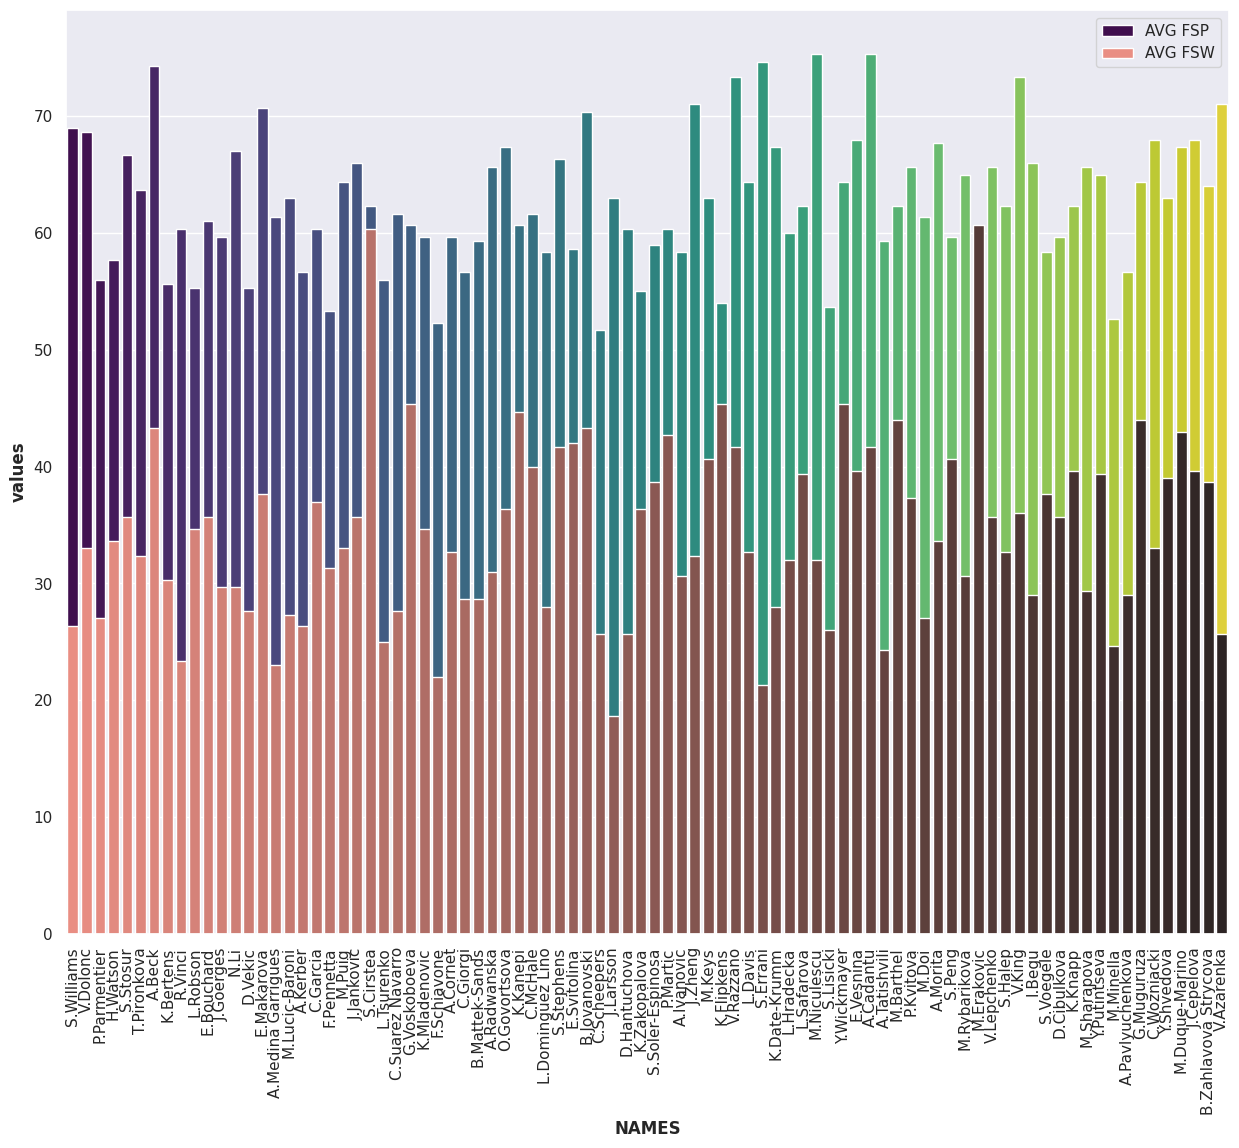

In [44]:
s1=sns.barplot(x="NAMES",y="avgfsp",data=dataf2,label="AVG FSP",palette="viridis")
s2=sns.barplot(x="NAMES",y="avgfsw",data=dataf2,label="AVG FSW",palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.ylabel("values",fontweight="bold")
plt.xlabel("NAMES",fontweight="bold")
plt.legend()
plt.show()
